In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from pycaret.classification import *
import shap

/Users/paula/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Loading data

In [2]:
customer_data= pd.read_csv('term-deposit-marketing-2020.csv')
customer_data.shape

(40000, 14)

In [3]:
customer_data.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


In [4]:
customer_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

In [5]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [6]:
customer_data.y.value_counts()

no     37104
yes     2896
Name: y, dtype: int64

## Data inspection & preprocessing

Text(0.5, 1.0, 'Boxplot of Age feature')

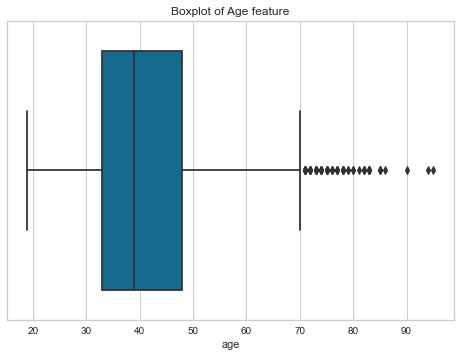

In [7]:
# Review outliers on age
sns.boxplot(customer_data['age'])
plt.title('Boxplot of Age feature')

Text(0.5, 1.0, 'Boxplot of Balance feature')

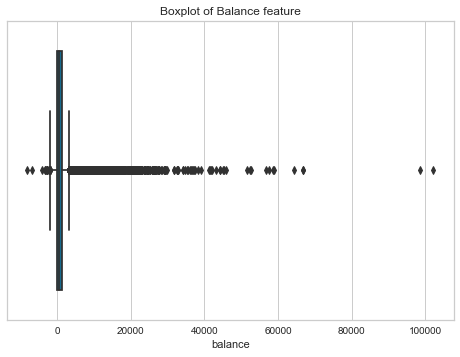

In [8]:
# Review outliers on balance
sns.boxplot(customer_data['balance'])
plt.title('Boxplot of Balance feature')

Text(0.5, 1.0, 'Boxplot of Day feature')

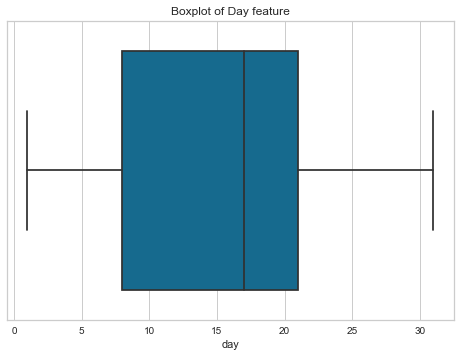

In [9]:
# Review outliers on day
sns.boxplot(customer_data['day'])
plt.title('Boxplot of Day feature')

Text(0.5, 1.0, 'Boxplot of Duration feature')

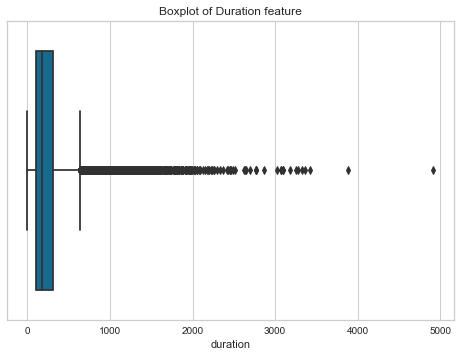

In [10]:
# Review outliers on duration
sns.boxplot(customer_data['duration'])
plt.title('Boxplot of Duration feature')

Text(0.5, 1.0, 'Boxplot of Campaign feature')

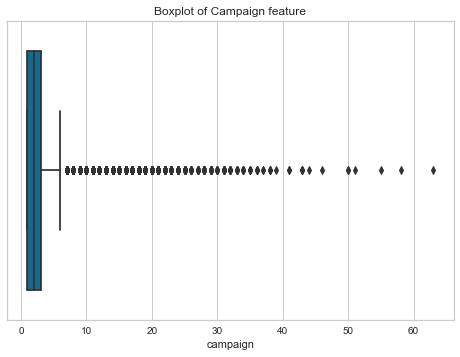

In [11]:
# Review outliers on duration
sns.boxplot(customer_data['campaign'])
plt.title('Boxplot of Campaign feature')

In [14]:
#Inspect correlations
customer_data.corr()

,age,balance,day,duration,campaign
age,1.000000,0.081517,-0.011689,-0.036270,0.016204
balance,0.081517,1.000000,0.011662,0.014072,-0.008137
day,-0.011689,0.011662,1.000000,-0.032983,0.165429
duration,-0.036270,0.014072,-0.032983,1.000000,-0.088387
campaign,0.016204,-0.008137,0.165429,-0.088387,1.000000


In [13]:
# Separate numerical variables
numerical_cols = ['age','duration','balance','campaign','day']

In [15]:
numerical_df = customer_data[numerical_cols]

In [16]:
# Scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_df_transf = pd.DataFrame(scaler.fit_transform(numerical_df),columns=numerical_df.columns)
numerical_df_transf

,age,duration,balance,campaign,day
0,1.810415,0.023811,0.299174,-0.581096,-1.330900
1,0.358382,-0.400305,-0.428854,-0.581096,-1.330900
2,-0.782501,-0.689474,-0.438152,-0.581096,-1.330900
3,0.669532,-0.627785,0.079802,-0.581096,-1.330900
4,-0.782501,-0.219092,-0.438497,-0.581096,-1.330900
...,...,...,...,...,...
39995,1.291832,-0.569951,-0.302809,-0.581096,-1.572504
39996,-1.093650,-0.064868,0.711402,0.036377,-1.572504
39997,1.395549,-0.327048,-0.369964,-0.581096,-1.572504
39998,-0.678784,0.336114,-0.078271,-0.581096,-1.572504


## Model Selection and Training

### Using PyCaret

In [17]:
# sample 5% of data to be used as unseen data
data = customer_data.sample(frac=0.95, random_state=786)
data_unseen = customer_data.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)

In [18]:
# init setup

s = setup(data = data, target = 'y', fold=5, session_id=123)

,Description,Value
0,session_id,123
1,Target,y
2,Target Type,Binary
3,Label Encoded,"no: 0, yes: 1"
4,Original Data,"(38000, 14)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


In [19]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9394,0.9515,0.4185,0.6068,0.4950,0.4640,0.4732,5.2960
lightgbm,Light Gradient Boosting Machine,0.9387,0.9501,0.4254,0.5965,0.4962,0.4646,0.4723,0.6020
gbc,Gradient Boosting Classifier,0.9381,0.9439,0.3635,0.6081,0.4540,0.4235,0.4398,2.3400
xgboost,Extreme Gradient Boosting,0.9379,0.9471,0.4254,0.5886,0.4934,0.4612,0.4684,3.8880
rf,Random Forest Classifier,0.9363,0.9392,0.2937,0.6096,0.3957,0.3664,0.3942,1.5380
lr,Logistic Regression,0.9356,0.9220,0.2619,0.6076,0.3657,0.3374,0.3711,4.7420
lda,Linear Discriminant Analysis,0.9349,0.9285,0.4423,0.5528,0.4907,0.4565,0.4601,0.2560
ridge,Ridge Classifier,0.9331,0.0000,0.1577,0.6163,0.2506,0.2283,0.2883,0.0740
ada,Ada Boost Classifier,0.9329,0.9300,0.3249,0.5459,0.4071,0.3740,0.3883,0.7480
et,Extra Trees Classifier,0.9328,0.9210,0.2190,0.5752,0.3164,0.2885,0.3265,1.5940


In [75]:
best_model = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9378,0.9511,0.4101,0.5894,0.4836,0.4516,0.4601
1,0.9402,0.9533,0.4206,0.6163,0.5000,0.4694,0.4791
2,0.9376,0.9412,0.4550,0.5772,0.5089,0.4761,0.4799
3,0.9395,0.9531,0.4392,0.6014,0.5076,0.4762,0.4829
4,0.9383,0.9516,0.4021,0.5984,0.4810,0.4496,0.4596
Mean,0.9387,0.9501,0.4254,0.5965,0.4962,0.4646,0.4723
Std,0.0010,0.0045,0.0193,0.0130,0.0118,0.0117,0.0103


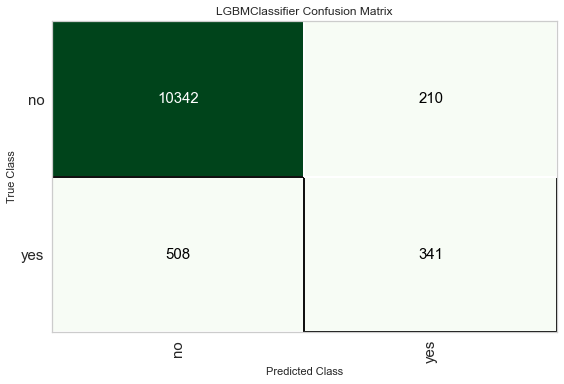

In [76]:
plot_model(best_model, plot = 'confusion_matrix')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

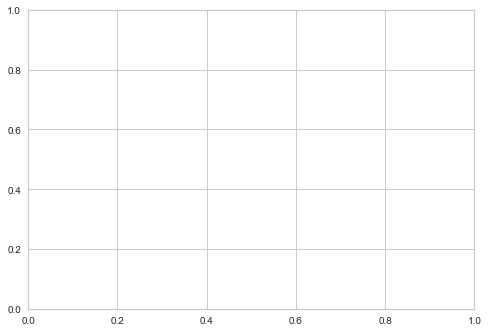

In [22]:
evaluate_model(best_model)

In [77]:
predict_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9370,0.9479,0.4016,0.6189,0.4871,0.4552,0.4673


,age,balance,day,duration,campaign,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,y,Label,Score
0,40.0,376.0,11.0,268.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,no,no,0.9988
1,59.0,3353.0,12.0,148.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,no,no,0.9992
2,31.0,0.0,29.0,82.0,5.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,no,no,0.9980
3,39.0,0.0,16.0,41.0,6.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,no,no,0.9997
4,30.0,2030.0,28.0,27.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,no,no,0.9996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11396,32.0,12686.0,3.0,54.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,no,no,0.9993
11397,50.0,0.0,6.0,327.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,no,no,0.9699
11398,45.0,276.0,9.0,346.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,no,no,0.9962
11399,51.0,371.0,4.0,52.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,no,no,0.9987


<b> The CatBoost model allows us to predict if a customer will subscribe or not with almost 94% accuracy

## We are also interested in finding customers who are more likely to buy the investment product. Determine the segment(s) of customers our client should prioritize.

In [25]:
import shap

In [58]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [38]:
y = customer_data['y']
y

0         no
1         no
2         no
3         no
4         no
        ... 
39995     no
39996    yes
39997    yes
39998     no
39999     no
Name: y, Length: 40000, dtype: object

In [39]:
# Parsing target to binary
y = np.where(y=='no',0,1)
y

array([0, 0, 0, ..., 1, 0, 0])

In [43]:
# Checking imbalance remains the same
np.unique(y, return_counts=True)

(array([0, 1]), array([37104,  2896]))

In [44]:
# We already have the numerical df from step 2
numerical_df_transf

,age,duration,balance,campaign,day
0,1.810415,0.023811,0.299174,-0.581096,-1.330900
1,0.358382,-0.400305,-0.428854,-0.581096,-1.330900
2,-0.782501,-0.689474,-0.438152,-0.581096,-1.330900
3,0.669532,-0.627785,0.079802,-0.581096,-1.330900
4,-0.782501,-0.219092,-0.438497,-0.581096,-1.330900
...,...,...,...,...,...
39995,1.291832,-0.569951,-0.302809,-0.581096,-1.572504
39996,-1.093650,-0.064868,0.711402,0.036377,-1.572504
39997,1.395549,-0.327048,-0.369964,-0.581096,-1.572504
39998,-0.678784,0.336114,-0.078271,-0.581096,-1.572504


In [48]:
# Now transform the categorical columns to dummies
categorical_df = customer_data[['job','marital','education','default','housing','loan','contact','month']]
categorical_df = pd.get_dummies(categorical_df,drop_first=True)
categorical_df

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
39996,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
39997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
39998,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [54]:
# Merge the df's
merged_df = pd.concat([numerical_df_transf,categorical_df],axis=1)
merged_df

,age,duration,balance,campaign,day,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct
0,1.810415,0.023811,0.299174,-0.581096,-1.330900,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0.358382,-0.400305,-0.428854,-0.581096,-1.330900,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.782501,-0.689474,-0.438152,-0.581096,-1.330900,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.669532,-0.627785,0.079802,-0.581096,-1.330900,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.782501,-0.219092,-0.438497,-0.581096,-1.330900,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,1.291832,-0.569951,-0.302809,-0.581096,-1.572504,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
39996,-1.093650,-0.064868,0.711402,0.036377,-1.572504,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
39997,1.395549,-0.327048,-0.369964,-0.581096,-1.572504,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
39998,-0.678784,0.336114,-0.078271,-0.581096,-1.572504,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [61]:
# Over sampling for imbalance
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(merged_df, y)

In [72]:
# Checking imbalance after SMOTE
np.unique(y_res, return_counts=True)

(array([0, 1]), array([37104, 37104]))

In [87]:
from catboost import CatBoostClassifier
model = CatBoostClassifier()
model

<AxesSubplot:>

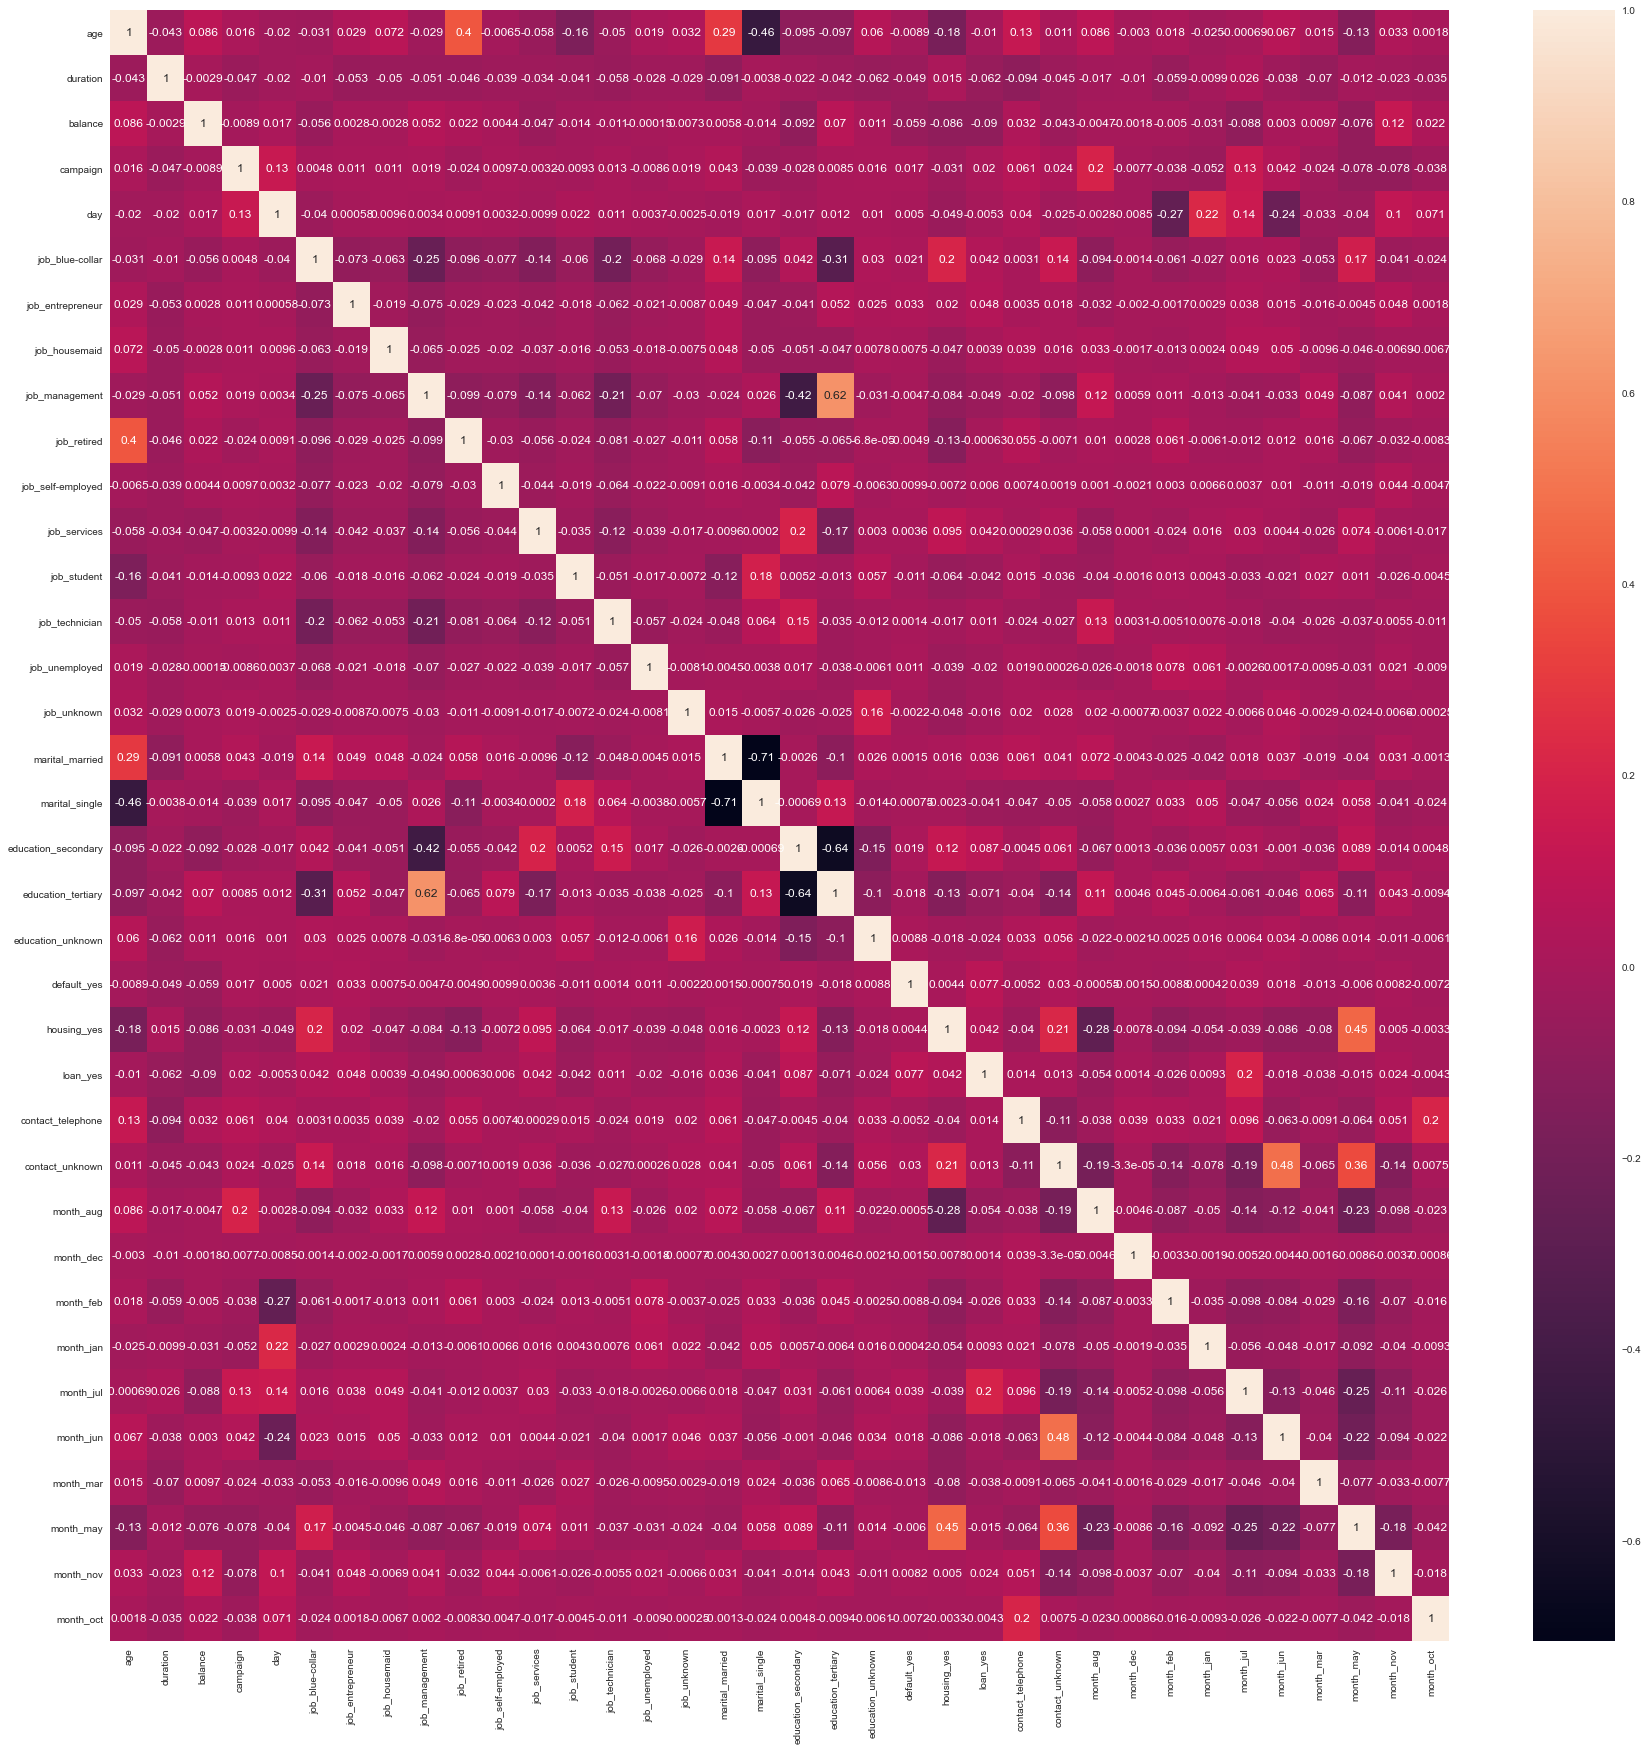

In [86]:
plt.figure(figsize=(30,30))
sns.heatmap(X_res.corr(),annot=True)

In [88]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

In [90]:
# Fit catboost
model.fit(X_train,y_train)

Learning rate set to 0.055651
0:	learn: 0.6382849	total: 26.1ms	remaining: 26.1s
1:	learn: 0.5861651	total: 40.6ms	remaining: 20.2s
2:	learn: 0.5469435	total: 56.3ms	remaining: 18.7s
3:	learn: 0.5171344	total: 73.1ms	remaining: 18.2s
4:	learn: 0.4881338	total: 86.5ms	remaining: 17.2s
5:	learn: 0.4691337	total: 102ms	remaining: 16.8s
6:	learn: 0.4418448	total: 115ms	remaining: 16.4s
7:	learn: 0.4240866	total: 129ms	remaining: 16s
8:	learn: 0.4103695	total: 152ms	remaining: 16.7s
9:	learn: 0.3958792	total: 166ms	remaining: 16.4s
10:	learn: 0.3792495	total: 180ms	remaining: 16.2s
11:	learn: 0.3695131	total: 200ms	remaining: 16.5s
12:	learn: 0.3600403	total: 226ms	remaining: 17.1s
13:	learn: 0.3512418	total: 244ms	remaining: 17.2s
14:	learn: 0.3454240	total: 260ms	remaining: 17.1s
15:	learn: 0.3389748	total: 274ms	remaining: 16.9s
16:	learn: 0.3341550	total: 295ms	remaining: 17.1s
17:	learn: 0.3302712	total: 311ms	remaining: 16.9s
18:	learn: 0.3251976	total: 340ms	remaining: 17.5s
19:	lear

173:	learn: 0.1510229	total: 2.68s	remaining: 12.7s
174:	learn: 0.1508309	total: 2.69s	remaining: 12.7s
175:	learn: 0.1504198	total: 2.71s	remaining: 12.7s
176:	learn: 0.1501589	total: 2.72s	remaining: 12.7s
177:	learn: 0.1497804	total: 2.73s	remaining: 12.6s
178:	learn: 0.1495830	total: 2.75s	remaining: 12.6s
179:	learn: 0.1489457	total: 2.76s	remaining: 12.6s
180:	learn: 0.1488036	total: 2.77s	remaining: 12.5s
181:	learn: 0.1482653	total: 2.78s	remaining: 12.5s
182:	learn: 0.1477471	total: 2.79s	remaining: 12.5s
183:	learn: 0.1475321	total: 2.8s	remaining: 12.4s
184:	learn: 0.1471638	total: 2.81s	remaining: 12.4s
185:	learn: 0.1466843	total: 2.83s	remaining: 12.4s
186:	learn: 0.1465333	total: 2.84s	remaining: 12.3s
187:	learn: 0.1459502	total: 2.85s	remaining: 12.3s
188:	learn: 0.1452136	total: 2.86s	remaining: 12.3s
189:	learn: 0.1449895	total: 2.87s	remaining: 12.3s
190:	learn: 0.1442657	total: 2.89s	remaining: 12.3s
191:	learn: 0.1440349	total: 2.91s	remaining: 12.2s
192:	learn: 0

334:	learn: 0.1088249	total: 5.13s	remaining: 10.2s
335:	learn: 0.1085055	total: 5.15s	remaining: 10.2s
336:	learn: 0.1083969	total: 5.16s	remaining: 10.2s
337:	learn: 0.1083319	total: 5.18s	remaining: 10.1s
338:	learn: 0.1081288	total: 5.19s	remaining: 10.1s
339:	learn: 0.1078121	total: 5.21s	remaining: 10.1s
340:	learn: 0.1077149	total: 5.22s	remaining: 10.1s
341:	learn: 0.1074708	total: 5.23s	remaining: 10.1s
342:	learn: 0.1073877	total: 5.24s	remaining: 10s
343:	learn: 0.1071751	total: 5.25s	remaining: 10s
344:	learn: 0.1070723	total: 5.27s	remaining: 10s
345:	learn: 0.1067630	total: 5.28s	remaining: 9.97s
346:	learn: 0.1066140	total: 5.29s	remaining: 9.96s
347:	learn: 0.1065505	total: 5.3s	remaining: 9.94s
348:	learn: 0.1064164	total: 5.31s	remaining: 9.91s
349:	learn: 0.1062504	total: 5.33s	remaining: 9.89s
350:	learn: 0.1061764	total: 5.34s	remaining: 9.87s
351:	learn: 0.1060684	total: 5.36s	remaining: 9.86s
352:	learn: 0.1060179	total: 5.37s	remaining: 9.84s
353:	learn: 0.10593

498:	learn: 0.0898045	total: 7.37s	remaining: 7.4s
499:	learn: 0.0897714	total: 7.39s	remaining: 7.39s
500:	learn: 0.0897193	total: 7.41s	remaining: 7.38s
501:	learn: 0.0896764	total: 7.43s	remaining: 7.37s
502:	learn: 0.0895773	total: 7.45s	remaining: 7.36s
503:	learn: 0.0895168	total: 7.46s	remaining: 7.35s
504:	learn: 0.0894707	total: 7.48s	remaining: 7.33s
505:	learn: 0.0894237	total: 7.49s	remaining: 7.31s
506:	learn: 0.0893825	total: 7.5s	remaining: 7.29s
507:	learn: 0.0892801	total: 7.51s	remaining: 7.28s
508:	learn: 0.0889664	total: 7.53s	remaining: 7.26s
509:	learn: 0.0888137	total: 7.54s	remaining: 7.24s
510:	learn: 0.0886789	total: 7.55s	remaining: 7.22s
511:	learn: 0.0884260	total: 7.56s	remaining: 7.21s
512:	learn: 0.0882040	total: 7.58s	remaining: 7.2s
513:	learn: 0.0880891	total: 7.6s	remaining: 7.18s
514:	learn: 0.0880263	total: 7.61s	remaining: 7.17s
515:	learn: 0.0879688	total: 7.62s	remaining: 7.15s
516:	learn: 0.0878892	total: 7.63s	remaining: 7.13s
517:	learn: 0.08

657:	learn: 0.0785256	total: 9.63s	remaining: 5s
658:	learn: 0.0784938	total: 9.65s	remaining: 4.99s
659:	learn: 0.0784737	total: 9.66s	remaining: 4.98s
660:	learn: 0.0784553	total: 9.67s	remaining: 4.96s
661:	learn: 0.0784091	total: 9.68s	remaining: 4.94s
662:	learn: 0.0782915	total: 9.7s	remaining: 4.93s
663:	learn: 0.0782542	total: 9.71s	remaining: 4.91s
664:	learn: 0.0782275	total: 9.72s	remaining: 4.89s
665:	learn: 0.0781862	total: 9.73s	remaining: 4.88s
666:	learn: 0.0781285	total: 9.74s	remaining: 4.86s
667:	learn: 0.0780320	total: 9.76s	remaining: 4.85s
668:	learn: 0.0779884	total: 9.77s	remaining: 4.83s
669:	learn: 0.0779656	total: 9.78s	remaining: 4.82s
670:	learn: 0.0779034	total: 9.79s	remaining: 4.8s
671:	learn: 0.0778700	total: 9.8s	remaining: 4.78s
672:	learn: 0.0778352	total: 9.81s	remaining: 4.77s
673:	learn: 0.0778053	total: 9.82s	remaining: 4.75s
674:	learn: 0.0777723	total: 9.84s	remaining: 4.74s
675:	learn: 0.0776961	total: 9.85s	remaining: 4.72s
676:	learn: 0.0776

826:	learn: 0.0701628	total: 11.9s	remaining: 2.49s
827:	learn: 0.0701172	total: 11.9s	remaining: 2.48s
828:	learn: 0.0700674	total: 11.9s	remaining: 2.46s
829:	learn: 0.0700153	total: 12s	remaining: 2.45s
830:	learn: 0.0699488	total: 12s	remaining: 2.43s
831:	learn: 0.0698724	total: 12s	remaining: 2.42s
832:	learn: 0.0698589	total: 12s	remaining: 2.4s
833:	learn: 0.0697924	total: 12s	remaining: 2.39s
834:	learn: 0.0697449	total: 12s	remaining: 2.37s
835:	learn: 0.0697164	total: 12s	remaining: 2.36s
836:	learn: 0.0696652	total: 12s	remaining: 2.34s
837:	learn: 0.0696461	total: 12s	remaining: 2.33s
838:	learn: 0.0696290	total: 12.1s	remaining: 2.31s
839:	learn: 0.0695786	total: 12.1s	remaining: 2.3s
840:	learn: 0.0695386	total: 12.1s	remaining: 2.28s
841:	learn: 0.0694940	total: 12.1s	remaining: 2.27s
842:	learn: 0.0694682	total: 12.1s	remaining: 2.25s
843:	learn: 0.0694141	total: 12.1s	remaining: 2.24s
844:	learn: 0.0693624	total: 12.1s	remaining: 2.23s
845:	learn: 0.0693465	total: 12.

989:	learn: 0.0641920	total: 14s	remaining: 141ms
990:	learn: 0.0641522	total: 14s	remaining: 127ms
991:	learn: 0.0641431	total: 14s	remaining: 113ms
992:	learn: 0.0641033	total: 14s	remaining: 98.8ms
993:	learn: 0.0640650	total: 14s	remaining: 84.7ms
994:	learn: 0.0640465	total: 14s	remaining: 70.6ms
995:	learn: 0.0639895	total: 14.1s	remaining: 56.5ms
996:	learn: 0.0639280	total: 14.1s	remaining: 42.4ms
997:	learn: 0.0638578	total: 14.1s	remaining: 28.3ms
998:	learn: 0.0638409	total: 14.1s	remaining: 14.1ms
999:	learn: 0.0637983	total: 14.1s	remaining: 0us


In [91]:
# Fits the explainer
explainer = shap.Explainer(model.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)
shap_values

Permutation explainer: 22264it [31:00, 11.91it/s]                             


.values =
array([[-0.04642857, -0.13785714, -0.04214286, ...,  0.02357143,
         0.        ,  0.        ],
       [ 0.02071429,  0.205     ,  0.00357143, ..., -0.01714286,
         0.        ,  0.        ],
       [-0.00928571, -0.10571429,  0.00642857, ...,  0.10285714,
         0.01571429,  0.15357143],
       ...,
       [ 0.05285714,  0.27785714,  0.00714286, ...,  0.03785714,
         0.00857143,  0.        ],
       [-0.07285714, -0.16285714, -0.00285714, ..., -0.03071429,
         0.00142857,  0.        ],
       [-0.06142857, -0.14      ,  0.02214286, ...,  0.06142857,
        -0.00285714,  0.        ]])

.base_values =
array([0.49, 0.49, 0.49, ..., 0.49, 0.49, 0.49])

.data =
array([[ 0.98068226, -0.36560422, -0.43884109, ...,  0.        ,
         0.        ,  0.        ],
       [-0.1048522 ,  1.81184394, -0.38881407, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.25466582, -0.46410247, -0.35472404, ...,  0.        ,
         0.        ,  1.        ],
   

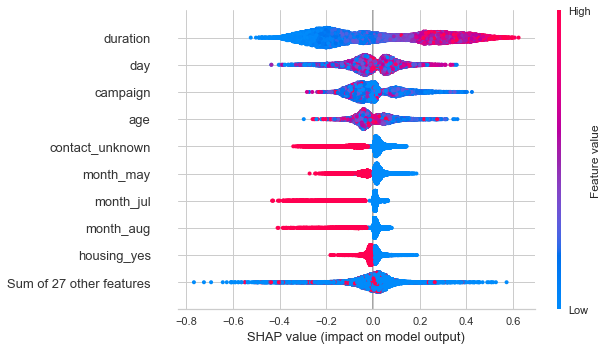

In [92]:
# Swarm plot
shap.plots.beeswarm(shap_values)

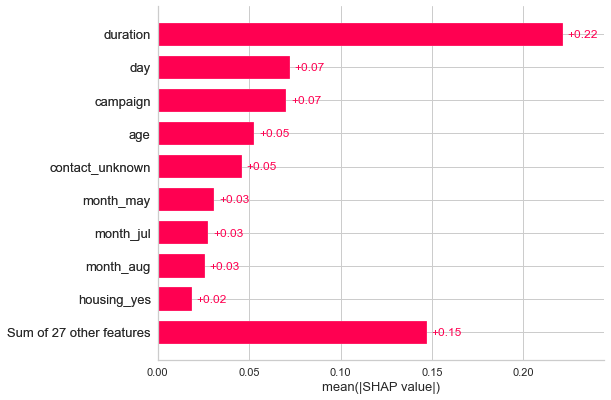

In [94]:
# Feature importance
shap.plots.bar(shap_values)

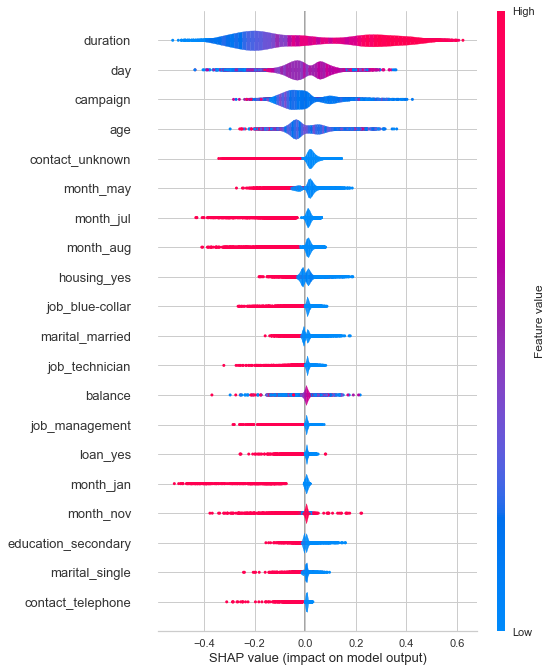

In [96]:
# Violin plot
shap.summary_plot(shap_values, plot_type='violin')

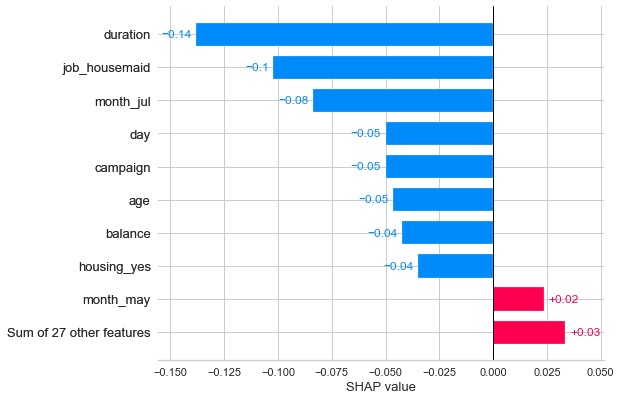

In [97]:
shap.plots.bar(shap_values[0])

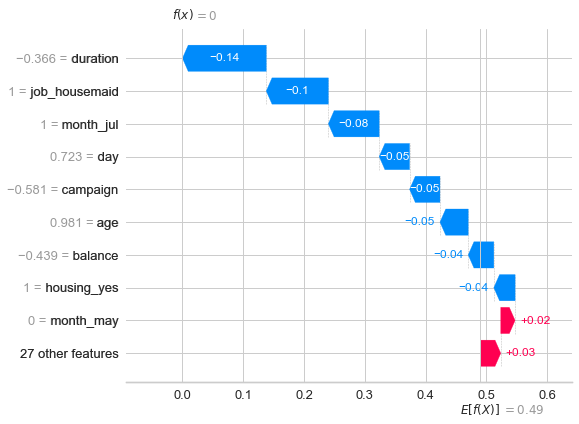

In [98]:
# Waterfall plot
shap.plots.waterfall(shap_values[0])